In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [8]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
data.isna().sum()

,0
Review,0
Liked,0


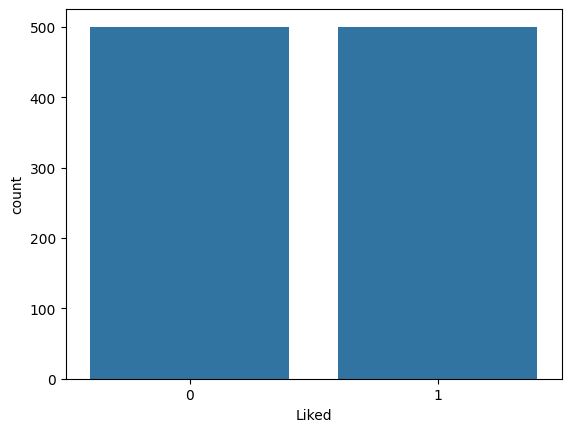

In [12]:
sns.countplot(x='Liked', data=data)
plt.show()

In [13]:
data.shape

(1000, 2)

In [14]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
corpus=[]

In [19]:
for i in range(0,1000):
  review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [21]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus).toarray()
Y=data.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [28]:
X_train.shape

(800, 1565)

In [29]:
X_test.shape

(200, 1565)

In [30]:
y_pred=classifier.predict(X_test)

<Axes: >

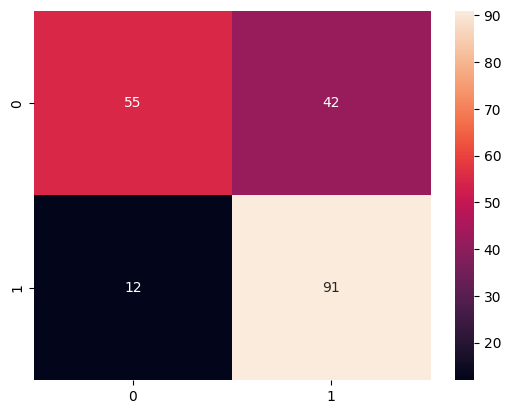

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

In [40]:
#accuracy
accuracy_score(Y_test,y_pred)

73.0

In [37]:
#predicting with new text
x_pred=np.array(['The Food is very tasty'])
x_pred=vectorizer.transform(x_pred).toarray()
classifier.predict(x_pred)

array([1])

In [39]:
x_pred=np.array(['Quality of food is very poor'])
x_pred=vectorizer.transform(x_pred).toarray()
classifier.predict(x_pred)

array([0])